# Intelligent Systems
# Solution: Assignment 2
### Working Group: Group 7
### Jehad Nasser, Huynh Thuc Nhat Truong, Asfynder Hashmi

The overall aim is to predict the **Water Level** and the **Water Flow** for main station, which monitors a river.

We have many features but we selected **Water Level** and the **Water Flow** for the following reasons:

Assuming:
------------
L = Water Level

W = Water Flow

T = Temperature in Celsius

H = Humidity

R = Raining

Let F = {L, W, T, H, R}


By observing data:
------------

We notice that T,H,R pre-conditions for L and W joint such that:

P(L,W | T,H,R)

But as For all T,R : P(L,W | T,R,H) = P(L,W | T,R) 

Then the feature H is irrelevant.

So G ⊆ F where G = {T, R}

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from datetime import datetime as dt


In [45]:
#pre-process data
df_main = pd.read_csv('station_main.csv')

df_a = pd.read_csv('station_a.csv')
df_b = pd.read_csv('station_b.csv')
df_c = pd.read_csv('station_c.csv')

df_new = df_a.merge(df_b,on='time')
df_new2 = df_new.merge(df_c,on='time')
df = df_new2.merge(df_main,on='time')

df = df.dropna()
df = df.reset_index(drop=True)

#change names of some columns
df.rename(columns={'temp_c_x':'temp_c_a', 'status_x':'humidity_a','rain_mm_x':'rain_mm_a','temp_c_y':'temp_c_b', 'status_y':'humidity_b','rain_mm_y':'rain_mm_b',
             'temp_c':'temp_c_c', 'status':'humidity_c','rain_mm':'rain_mm_c','level_cm':'level_cm_main','flow_m2_s':'flow_m3_s_main'},inplace=True)
#drop rows with temp = -999
df = df.drop(df[df.temp_c_c == -999].index)
df = df.drop(df[df.temp_c_a == -999].index)
df = df.drop(df[df.temp_c_b == -999].index)
#drop rows with rain < 0
df = df.drop(df[df.rain_mm_a < 0].index)
df = df.drop(df[df.rain_mm_b < 0].index)
df = df.drop(df[df.rain_mm_c < 0].index)
#replace the humidity with numbers
df = df.replace({"humidity_a": {"max" : 0.85}})
df = df.replace({"humidity_b": {"max" : 0.85}})
df = df.replace({"humidity_c": {"max" : 0.85}})
#normal -> average
df = df.replace({"humidity_a": {"normal" : 0.79}})
df = df.replace({"humidity_b": {"normal" : 0.79}})
df = df.replace({"humidity_c": {"normal" : 0.79}})

df = df.replace({"humidity_a": {"increased" : 0.82}})
df = df.replace({"humidity_b": {"increased" : 0.82}})
df = df.replace({"humidity_c": {"increased" : 0.82}})

df = df.replace({"humidity_a": {"decreased" : 0.72}})
df = df.replace({"humidity_b": {"decreased" : 0.72}})
df = df.replace({"humidity_c": {"decreased" : 0.72}})
#low -> lowest
df = df.replace({"humidity_a": {"low" : 0.69}})
df = df.replace({"humidity_b": {"low" : 0.69}})
df = df.replace({"humidity_c": {"low" : 0.69}})

#convert time to float.
t = dt.utcnow().strftime(df['time'][0])


def strToDate(strDate):
    return dt.strptime(strDate, '%Y-%m-%d %H:%M:%S')
new = []
for i in df['time']:
    i = strToDate(i) - strToDate(t)
    new.append(i)
seconds = pd.DataFrame(new,columns=['time'])
seconds['time'] = seconds['time'].dt.total_seconds()
#assign the value of seconds to time to replace all values of time column
df = df.assign(time=seconds['time'])
df


,time,temp_c_a,humidity_a,rain_mm_a,temp_c_b,humidity_b,rain_mm_b,temp_c_c,humidity_c,rain_mm_c,level_cm_main,flow_m3_s_main
0,0.0,2.6,0.79,0.0,-5.7,0.82,0.0,2.8,0.79,0.0,182.0,7.19
1,3600.0,2.4,0.79,0.0,-2.0,0.79,0.0,2.5,0.79,0.0,182.0,7.19
2,7200.0,1.9,0.79,0.0,-0.8,0.79,0.0,1.9,0.79,0.0,182.0,7.19
3,10800.0,2.0,0.79,0.0,-1.6,0.79,0.0,2.1,0.79,0.0,182.0,7.19
4,14400.0,1.7,0.79,0.0,-2.3,0.82,0.0,2.1,0.79,0.0,182.0,7.19
...,...,...,...,...,...,...,...,...,...,...,...,...
31175,126208800.0,8.9,0.85,0.1,-0.6,0.85,0.0,9.0,0.85,0.0,255.0,15.90
31176,126212400.0,8.9,0.85,0.0,-2.3,0.85,0.0,9.3,0.82,0.0,259.0,16.40
31177,126216000.0,8.9,0.85,0.0,-1.0,0.82,0.0,9.2,0.85,0.0,263.0,16.90
31178,126219600.0,8.7,0.85,0.2,-1.7,0.82,0.0,8.9,0.82,0.5,268.0,17.50


[1.48862305e+02 1.29925312e+01 5.13881204e-01 3.76722507e-01
 2.63416834e-01 9.63547035e-02 3.12785052e-03 2.00580267e-04
 1.19964708e-03]
Variance Explained:  [9.12651234e-01 7.96551524e-02 3.15052434e-03 2.30962607e-03
 1.61496692e-03 5.90735438e-04 1.91763565e-05 1.22972587e-06
 7.35484641e-06]
Cumulative Variance Explained:  [0.91265123 0.99230639 0.99545691 0.99776654 0.9993815  0.99997224
 0.99999142 0.99999265 1.        ]


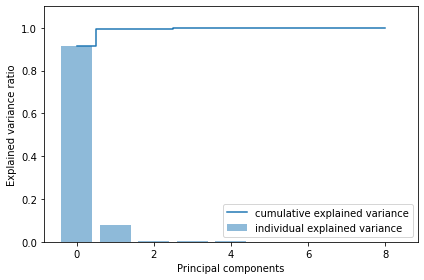

In [46]:
#Priciple Component Analysis
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline


length = len(df)
mean = []

#some calculations:
##Station A
mean_temp_a = sum(df['temp_c_a'])/length
mean.append(mean_temp_a)

mean_humidity_a = sum(df['humidity_a'])/length
mean.append(mean_humidity_a)

mean_rain_a = sum(df['rain_mm_a'])/length
mean.append(mean_rain_a)

##Station B
mean_temp_b = sum(df['temp_c_b'])/length
mean.append(mean_temp_b)

mean_humidity_b = sum(df['humidity_b'])/length
mean.append(mean_humidity_b)

mean_rain_b = sum(df['rain_mm_b'])/length
mean.append(mean_rain_b)

##Station C
mean_temp_c = sum(df['temp_c_c'])/length
mean.append(mean_temp_c)

mean_humidity_c = sum(df['humidity_c'])/length
mean.append(mean_humidity_c)

mean_rain_c = sum(df['rain_mm_c'])/length
mean.append(mean_rain_c)

##Main Station
mean_water_lvl = sum(df['level_cm_main'])/length
mean.append(mean_water_lvl)

mean_flow = sum(df['flow_m3_s_main'])/length
mean.append(mean_flow)


#generate all of means wrt columns
mean_df = pd.DataFrame([mean], columns=['temp_c_a', 'humidity_a', 'rain_mm_a', 'temp_c_b', 'humidity_b', 'rain_mm_b',
            'temp_c_c', 'humidity_c', 'rain_mm_c','level_cm_main','flow_m3_s_main'])
#covariance matrix

cov_df = df.drop(['time','level_cm_main','flow_m3_s_main'],axis=1)
covMatrix = pd.DataFrame.cov(cov_df)
#Calculate eingenvalues and vectors
eigenVal, eigenVec = np.linalg.eig(covMatrix)
eigenVal = np.linalg.eigvals(covMatrix)
print(eigenVal)
#estimate number of dimensions
eig_vals_total = np.sum(eigenVal)
var_exp = eigenVal / eig_vals_total
cum_var_exp = np.cumsum(var_exp)
print('Variance Explained: ', var_exp)
print('Cumulative Variance Explained: ', cum_var_exp)

plt.bar(range(var_exp.shape[0]), var_exp, alpha = 0.5, 
        align = 'center', label = 'individual explained variance')
plt.step(range(var_exp.shape[0]), cum_var_exp, 
         where = 'mid', label = 'cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.ylim(0, 1.1)
plt.legend(loc = 'best')
plt.tight_layout()


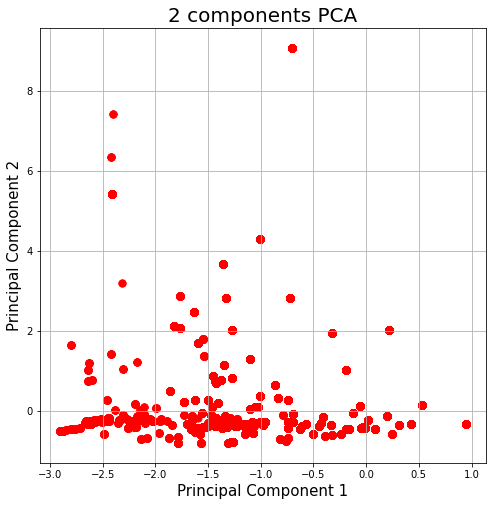

In [47]:


#set of considering features
features = ['temp_c_a', 'humidity_a', 'rain_mm_a', 'temp_c_b', 'humidity_b', 'rain_mm_b',
            'temp_c_c', 'humidity_c', 'rain_mm_c']
# Separating out the features
x = df.loc[:, features].values
# Separating out the time, level of water and water flow
y = df.loc[:,['level_cm_main']].values
y = df.loc[:,['flow_m3_s_main']].values
y = df.loc[:,['time']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

#PCA steps
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)
#also aka transformed data
principal_df = pd.DataFrame(data = principalComponents, columns = ['pc_1', 'pc_2'])

#after conduct pca, insert our target data into it e.g. level of water
final_df = pd.concat([principal_df, df[['level_cm_main']]], axis = 1)

final_df

#plot the result

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 components PCA', fontsize = 20)
colors = ['r']

indicesToKeep = final_df['level_cm_main'] 
ax.scatter(final_df.loc[indicesToKeep, 'pc_1']
            , final_df.loc[indicesToKeep, 'pc_2']
            , c = colors
            , s = 50)
# ax.legend(level_cm_main)
ax.grid()

In [48]:
principalComponents
final_df = pd.concat([final_df, df[['flow_m3_s_main']]], axis = 1)
final_df

,pc_1,pc_2,level_cm_main,flow_m3_s_main
0,-1.580961,-0.966079,182.0,7.19
1,-1.227960,-0.919360,182.0,7.19
2,-1.238432,-0.924314,182.0,7.19
3,-1.260100,-0.931580,182.0,7.19
4,-1.510408,-0.942941,182.0,7.19
...,...,...,...,...
31175,-1.750571,0.145299,255.0,15.90
31176,-1.548747,-0.154175,259.0,16.40
31177,-1.556296,-0.003595,263.0,16.90
31178,-1.415172,0.744701,268.0,17.50


## Inconsistency Calcmulation:

In [51]:
# def min_max_normalize(var, n_min, n_max):
#     pre_min = min(var)
#     pre_max = max(var)
    
#     temp = []
#     for i in var:
#         temp.append((i-pre_min)*(n_max-n_min)/(pre_max-pre_min)+n_min)
    
#     return temp

# final_df['level_cm_main'] = min_max_normalize(final_df.level_cm_main.values, 0, 10)
# final_df['flow_m3_s_main'] = min_max_normalize(final_df.flow_m3_s_main.values, 0, 10)

# def IZ(row):
#     return row['level_cm_main'] + row['flow_m3_s_main'] - max(row['level_cm_main'],row['flow_m3_s_main'])

# IR = sum([IZ(row) for _, row in final_df.iterrows()])/ sum([row['level_cm_main'] + 
#                                                             row['flow_m3_s_main'] for _, row in final_df.iterrows()])

# IR

0.4133974549444489

In [1]:
main_df 

NameError: name 'main_df' is not defined